# Task 2: To Explore Supervised Machine Learning

## Simple Linear Regression
### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing Data through link
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory Data Analysis(EDA)

In [4]:
#Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Checking the shape of the data
data.shape

(25, 2)

In [7]:
#Checking null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### From above correlation we can see that there is strong positive correlation between score and hours.

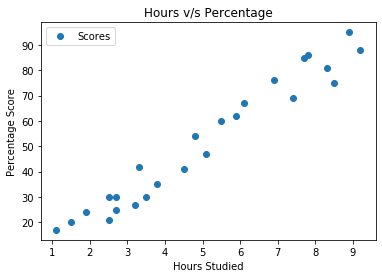

In [9]:
#PLotting the distribution of the data
data.plot('Hours','Scores',style = 'o')
plt.title("Hours v/s Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

#### From above graph we can see that there is a positive relationship between number of hours studied and percentage score.

### Preparing the data

In [10]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [11]:
#Splitting the data into train and test 
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

In [12]:
# Fitting the model
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Percentage score')

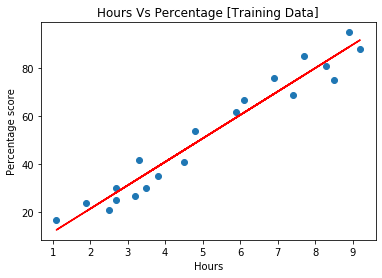

In [13]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),color = 'red')
plt.title("Hours Vs Percentage [Training Data]")
plt.xlabel("Hours")
plt.ylabel("Percentage score")

Text(0, 0.5, 'Percentage score')

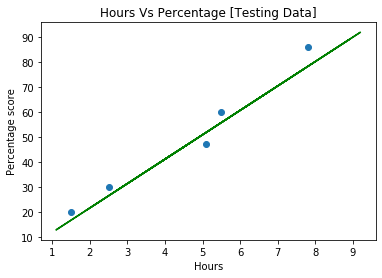

In [14]:
plt.scatter(x_test,y_test)
plt.plot(x_train,regressor.predict(x_train),color = 'green')
plt.title("Hours Vs Percentage [Testing Data]")
plt.xlabel("Hours")
plt.ylabel("Percentage score")

In [15]:
y_pred = regressor.predict(x_test)

In [16]:
# Comparing Actual vs Predicted
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
0,20,16.634424
1,47,51.760919
2,86,78.105790
3,60,55.663863
4,30,26.391784


In [17]:
# Predicting Score if a student studies for 9.25 hours in a day
hours = 9.25
pred = regressor.predict([[hours]])
print(pred)

[92.25396101]


#### If student studies for 9.25 hours a day his/her predicted score is 95.25 percentage.

### Evaluating the model

In [18]:
# R-squared value and Mean Absolute Error
from sklearn import metrics
print('R-sqaured',metrics.r2_score(y_test,y_pred))
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_pred))

R-sqaured 0.9524586989581167
Mean Absolute Error 4.793011638011423


#### The accuracy of model is 95.24 % and Mean Absolute Error is 4.79%.